In [1]:
>>> import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
from math import sin, cos, sqrt, atan2, radians
import json
import pprint
import ast 

In [2]:
Course_df = pd.read_excel(r"C:\Users\gercek_babam_artun\Desktop\2014-2015-Fall-Course.xlsx") #course list
TA_df =pd.read_excel(r"C:\Users\gercek_babam_artun\Desktop\2014-2015-Fall-TA.xlsx") # TA preference list

In [3]:

n_rows, n_columns = Course_df.shape  # get the shape of dataframe
print("Shape of course dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of course dataframe is
number of rows: 110, number of columns: 9


In [4]:

n_rows, n_columns = TA_df.shape  # get the shape of dataframe
print("Shape of TA dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of TA dataframe is
number of rows: 276, number of columns: 11


In [5]:
print("276 TA's assigned to FENS courses during fall semester of 2014/2015")

276 TA's assigned to FENS courses during fall semester of 2014/2015


## Brief preview of both TA and Course preference lists

In [6]:
TA_df.head() # a brief overview on data 

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,19928,Abba Ibrahim \nRamadan,MS,MATH,20,20,NaN,MATH 101,10641.0,NaN,NaN
1,18282,Abdolali \nKhalili Sadaghiani,MS,ME,10,10,1- ME 307 (20 / 20)\n2- MATH 102 (160 / 180),MATH 102,10676.0,NaN,NaN
2,11720,Abdullah \nKamadan,PHD,ME,10,10,1- MATH 201 (170 / 105)\n2- MATH 102 (160 / 18...,MATH 201,10835.0,NaN,NaN
3,19996,Abdullahi \nAdamu,MS,EE,10,10,NaN,MATH 203,10732.0,NaN,NaN
4,17198,Ahmed \nNouman,PHD,ME,10,10,1- MATH 201 (170 / 105)\n2- MATH 203 (160 / 17...,MATH 102,10676.0,NaN,NaN


In [7]:
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
0,NaN,NaN,NaN,NaN,Grad Program,NaN,NaN,NaN,NaN
1,10009.0,BIO 304,0,Biological Func.&Structure,NaN,0.0,10.0,1-Kadriye Kahraman ( 62009 ) (10 / 10)\n2-Tuğc...,None
2,10010.0,BIO 306,0,Microbiology,NaN,15.0,15.0,1-Hacer Ezgi Karakaş ( 61751 ) (10 / 10)\n1-Yu...,"Yunus Akkoc (62185, BIO, 10 hours)\nDeniz Gulf..."
3,10012.0,BIO 308,0,Plant Physiology,NaN,10.0,15.0,2-Ipek Ozdemir ( 62010 ) (10 / 10),"Yasemin Ceylan (62085, BIO, 10 hours)"
4,10014.0,BIO 321,0,Biochemistry I,NaN,15.0,15.0,1-Bahriye Karakaş ( 61871 ) (15 / 20)\n2-Secil...,"Bahriye Karakaş (61871, BIO, 15 hours)"


## Data types for TA & Courses dataframes

In [8]:
TA_df.dtypes

Student ID             int64
Name                  object
Degree                object
Program               object
Hours Assigned         int64
Hours Requested        int64
Requested Courses     object
Assigned Course 1     object
CRN 1                float64
Assigned Course 2     object
CRN 2                float64
dtype: object

In [9]:
Course_df.dtypes

CRN                          float64
Name                          object
Section                       object
Title                         object
Preferred                     object
Hours Assigned               float64
Hours Requested              float64
Requesting Teaching Grads     object
Assigned Teaching Grads       object
dtype: object

## Dealing with Dirty Data

In [10]:
# TA dataframe first
TA_df = TA_df.fillna(0) # NaN values are cumbersome values. Change all to 0

In [11]:
TA_df['CRN 1'] = TA_df['CRN 1'].astype('int64') # CRN values are actually integer values. However , they are float in the file
# Change the CRN 1 column value type to int as expected

In [12]:
TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')
#Change the CRN 2 column value type to int as expecte

In [13]:
TA_df.head() # Clean Data 

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,19928,Abba Ibrahim \nRamadan,MS,MATH,20,20,0,MATH 101,10641,0,0
1,18282,Abdolali \nKhalili Sadaghiani,MS,ME,10,10,1- ME 307 (20 / 20)\n2- MATH 102 (160 / 180),MATH 102,10676,0,0
2,11720,Abdullah \nKamadan,PHD,ME,10,10,1- MATH 201 (170 / 105)\n2- MATH 102 (160 / 18...,MATH 201,10835,0,0
3,19996,Abdullahi \nAdamu,MS,EE,10,10,0,MATH 203,10732,0,0
4,17198,Ahmed \nNouman,PHD,ME,10,10,1- MATH 201 (170 / 105)\n2- MATH 203 (160 / 17...,MATH 102,10676,0,0


In [14]:
# Course dataframes turn
Course_df = Course_df.fillna(0) # replace all NaN values with 0

In [15]:
Course_df = Course_df.drop(Course_df.index[0])

In [48]:
Course_df.head(30)

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,10009,BIO 304,0,Biological Func.&Structure,0,0,10,1-Kadriye Kahraman ( 62009 ) (10 / 10)\n2-Tuğc...,None
2,10010,BIO 306,0,Microbiology,0,15,15,1-Hacer Ezgi Karakaş ( 61751 ) (10 / 10)\n1-Yu...,"Yunus Akkoc (62185, BIO, 10 hours)\nDeniz Gulf..."
3,10012,BIO 308,0,Plant Physiology,0,10,15,2-Ipek Ozdemir ( 62010 ) (10 / 10),"Yasemin Ceylan (62085, BIO, 10 hours)"
4,10014,BIO 321,0,Biochemistry I,0,15,15,1-Bahriye Karakaş ( 61871 ) (15 / 20)\n2-Secil...,"Bahriye Karakaş (61871, BIO, 15 hours)"
5,10016,BIO 332,0,Cell Biology,0,5,15,2-Ahsen Ozcan ( 61768 ) (10 / 10)\n3-Ece Canan...,"Tuğce Oruc (61776, BIO, 5 hours)"
6,10018,BIO 445,0,Plant Tissue Culture Tech.,0,10,5,2-Melike Cokol ( 62121 ) (10 / 10)\n3-Nur Mehp...,"Melike Cokol (62121, BIO, 10 hours)"
7,10020,BIO 447,0,Plant Breeding,0,25,10,1-Bala Ani Akpinar ( 62013 ) (10 / 10)\n1-Reyy...,"Bala Ani Akpinar (62013, BIO, 10 hours)\nReyya..."
8,10250,BIO 452,0,Immunology,0,0,5,1-Ahsen Ozcan ( 61768 ) (10 / 10)\n1-Bahar Sha...,None
9,10245,BIO 466,0,Biophysics: Molecules and Sys.,0,5,5,1-Tuğce Oruc ( 61776 ) (10 / 10)\n2-Haleh Abdi...,"Tuğce Oruc (61776, BIO, 5 hours)"
10,10253,CHEM 301,0,Inorganic Chemistry,0,10,20,1-Vildan Bayram ( 61844 ) (10 / 10)\n2-Zahra G...,"Zahra Goharibajestani (61965, MAT, 5 hours)\nF..."


In [17]:
Course_df['CRN'] = Course_df['CRN'].astype('int64')

In [18]:
Course_df['Hours Assigned'] = Course_df['Hours Assigned'].astype('int64')

In [19]:
Course_df['Hours Requested'] = Course_df['Hours Requested'].astype('int64')

In [20]:
#Dirty data is handled 
#in the following steps , splitlines also used for handling dirty data.
# Does the course require 2 TAs or 3 TAs

## How many TA's requested for each course ? 

In [51]:
for courses in range(1,110) :
    data = Course_df.at[courses,'Requesting Teaching Grads'].splitlines() 
    print(Course_df.at[courses,'Name'] , "requested" ,len(data),"TA's")

BIO 304 requested 3 TA's
BIO 306 requested 5 TA's
BIO 308 requested 1 TA's
BIO 321 requested 3 TA's
BIO 332 requested 2 TA's
BIO 445 requested 5 TA's
BIO 447 requested 5 TA's
BIO 452 requested 5 TA's
BIO 466 requested 2 TA's
CHEM 301 requested 2 TA's
CS 201 requested 17 TA's
CS 201 requested 17 TA's
CS 201 requested 17 TA's
CS 204 requested 12 TA's
CS 300 requested 6 TA's
CS 302 requested 3 TA's
CS 303 requested 9 TA's
CS 307 requested 14 TA's
CS 400 requested 14 TA's
CS 402 requested 14 TA's
CS 408 requested 2 TA's
CS 411 requested 2 TA's
CS 412 requested 6 TA's
EL 303 requested 3 TA's
EL 305 requested 1 TA's
EL 401 requested 2 TA's
EL 407 requested 4 TA's
EL 473 requested 2 TA's
EL 480 requested 1 TA's
ENS 202 requested 3 TA's
ENS 203 requested 4 TA's
ENS 205 requested 22 TA's
ENS 207 requested 1 TA's
ENS 208 requested 8 TA's
ENS 209 requested 14 TA's
ENS 210 requested 14 TA's
ENS 211 requested 6 TA's
ENS 315 requested 1 TA's
ENS 413 requested 5 TA's
ENS 480 requested 4 TA's
ENS 491 

## How many TA's assigned to each course

In [53]:
for TA in range(1,110) :
    if Course_df.at[TA,'Assigned Teaching Grads'] != "None" :
        data = Course_df.at[TA,'Requesting Teaching Grads'].splitlines()
        print(Course_df.at[TA,'Name'] , "assigned" ,len(data),"TA's")
    else :
        print(Course_df.at[TA,'Name'] , "assigned" , 0,"TA's")

BIO 304 assigned 0 TA's
BIO 306 assigned 5 TA's
BIO 308 assigned 1 TA's
BIO 321 assigned 3 TA's
BIO 332 assigned 2 TA's
BIO 445 assigned 5 TA's
BIO 447 assigned 5 TA's
BIO 452 assigned 0 TA's
BIO 466 assigned 2 TA's
CHEM 301 assigned 2 TA's
CS 201 assigned 17 TA's
CS 201 assigned 0 TA's
CS 201 assigned 0 TA's
CS 204 assigned 12 TA's
CS 300 assigned 6 TA's
CS 302 assigned 3 TA's
CS 303 assigned 9 TA's
CS 307 assigned 14 TA's
CS 400 assigned 0 TA's
CS 402 assigned 0 TA's
CS 408 assigned 2 TA's
CS 411 assigned 2 TA's
CS 412 assigned 6 TA's
EL 303 assigned 3 TA's
EL 305 assigned 1 TA's
EL 401 assigned 2 TA's
EL 407 assigned 4 TA's
EL 473 assigned 2 TA's
EL 480 assigned 1 TA's
ENS 202 assigned 3 TA's
ENS 203 assigned 4 TA's
ENS 205 assigned 22 TA's
ENS 207 assigned 1 TA's
ENS 208 assigned 8 TA's
ENS 209 assigned 14 TA's
ENS 210 assigned 14 TA's
ENS 211 assigned 6 TA's
ENS 315 assigned 1 TA's
ENS 413 assigned 5 TA's
ENS 480 assigned 0 TA's
ENS 491 assigned 4 TA's
MAT 305 assigned 9 TA's
MAT 

In [23]:
# what happened to 0 Ta courses ? Are they closed for the corresponding semester ?

In [24]:
# Analyzing TA dataframe
TA_df.head(30)

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,19928,Abba Ibrahim \nRamadan,MS,MATH,20,20,0,MATH 101,10641,0,0
1,18282,Abdolali \nKhalili Sadaghiani,MS,ME,10,10,1- ME 307 (20 / 20)\n2- MATH 102 (160 / 180),MATH 102,10676,0,0
2,11720,Abdullah \nKamadan,PHD,ME,10,10,1- MATH 201 (170 / 105)\n2- MATH 102 (160 / 18...,MATH 201,10835,0,0
3,19996,Abdullahi \nAdamu,MS,EE,10,10,0,MATH 203,10732,0,0
4,17198,Ahmed \nNouman,PHD,ME,10,10,1- MATH 201 (170 / 105)\n2- MATH 203 (160 / 17...,MATH 102,10676,0,0
5,10024,Ahmet \nŞahinöz,PHD,ME,10,10,1- ME 301 (40 / 40)\n2- NS 101 (405 / 215)\n3-...,ME 301,10391,0,0
6,17178,Ahmet Emin\nBulut,MS,CS,10,10,1- MATH 306 (60 / 105)\n2- MATH 203 (160 / 175...,MATH 306,10770,0,0
7,18632,Ahsen \nŌzcan,MS,BIO,10,10,1- BIO 452 (0 / 5)\n2- BIO 332 (5 / 15),NS 201,10466,0,0
8,18370,Ali \nAnsari Hamedani,PHD,MAT,10,10,1- ENS 205 (80 / 60)\n2- ENS 202 (20 / 25)\n3-...,MATH 102,10676,0,0
9,17205,Ali \nAsgharpour,PHD,PHYS,20,20,1- MATH 203 (160 / 175)\n2- NS 101 (405 / 215)...,NS 101,10733,0,0


In [25]:
TA_df['Name'] = TA_df['Name'].replace('\n',' ', regex=True)

In [28]:
TA_df['Assigned Course 2'] = TA_df['Assigned Course 2'].replace('\n',' ', regex=True)

In [29]:
TA_df.head(30)

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,19928,Abba Ibrahim Ramadan,MS,MATH,20,20,0,MATH 101,10641,0,0
1,18282,Abdolali Khalili Sadaghiani,MS,ME,10,10,1- ME 307 (20 / 20)\n2- MATH 102 (160 / 180),MATH 102,10676,0,0
2,11720,Abdullah Kamadan,PHD,ME,10,10,1- MATH 201 (170 / 105)\n2- MATH 102 (160 / 18...,MATH 201,10835,0,0
3,19996,Abdullahi Adamu,MS,EE,10,10,0,MATH 203,10732,0,0
4,17198,Ahmed Nouman,PHD,ME,10,10,1- MATH 201 (170 / 105)\n2- MATH 203 (160 / 17...,MATH 102,10676,0,0
5,10024,Ahmet Şahinöz,PHD,ME,10,10,1- ME 301 (40 / 40)\n2- NS 101 (405 / 215)\n3-...,ME 301,10391,0,0
6,17178,Ahmet Emin Bulut,MS,CS,10,10,1- MATH 306 (60 / 105)\n2- MATH 203 (160 / 175...,MATH 306,10770,0,0
7,18632,Ahsen Ōzcan,MS,BIO,10,10,1- BIO 452 (0 / 5)\n2- BIO 332 (5 / 15),NS 201,10466,0,0
8,18370,Ali Ansari Hamedani,PHD,MAT,10,10,1- ENS 205 (80 / 60)\n2- ENS 202 (20 / 25)\n3-...,MATH 102,10676,0,0
9,17205,Ali Asgharpour,PHD,PHYS,20,20,1- MATH 203 (160 / 175)\n2- NS 101 (405 / 215)...,NS 101,10733,0,0


In [30]:
# Remaining dirty data handled -> removed \n characters from the dataframe


## Number of Ta's for each program

In [36]:
top_programs = TA_df['Program'].value_counts()
print(top_programs)

MAT     55
IE      43
CS      41
ME      37
EE      30
BIO     29
MATH    24
PHYS    17
Name: Program, dtype: int64


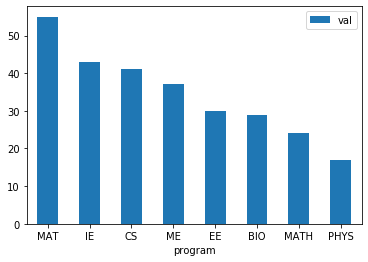

In [47]:
df = pd.DataFrame({'program':['MAT', 'IE', 'CS','ME','EE','BIO','MATH','PHYS'], 'val':[55, 43, 41,37,30,29,24,17]})
ax = df.plot.bar(x='program', y='val', rot=0)